# Data Quality Validation and Analysis

This notebook implements the data validation workflow for our banking system, handling both transaction and customer data.

## 1. Setup and Data Loading

First, we'll import necessary libraries and load our data files.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import great_expectations as gx
from datetime import datetime
import warnings 

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set up plotting style
sns.set()
sns.set_palette('husl')

# Load the data files
transactions_df = pd.read_csv('../data/working/transactions.csv')
customers_df = pd.read_csv('../data/working/sebank_customers_with_accounts.csv')

print(f"Loaded {len(transactions_df)} transactions and {len(customers_df)} customer records.")

Loaded 100000 transactions and 1000 customer records.


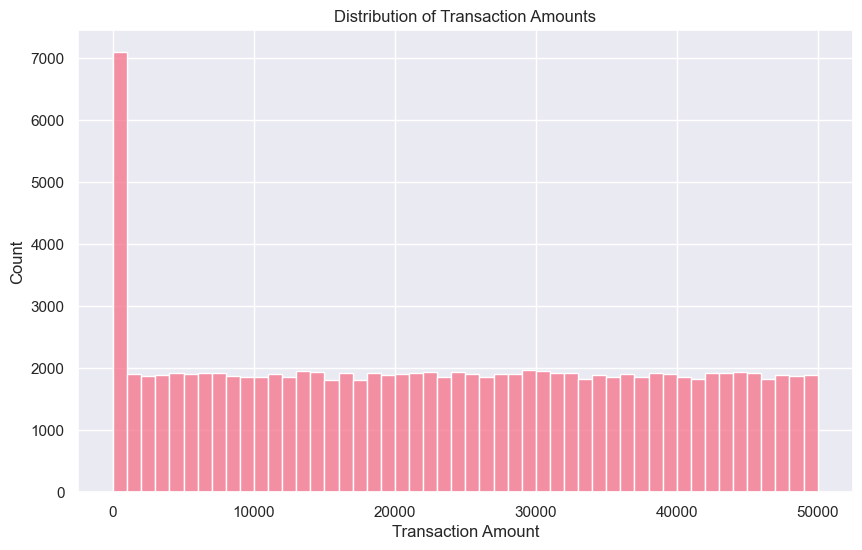

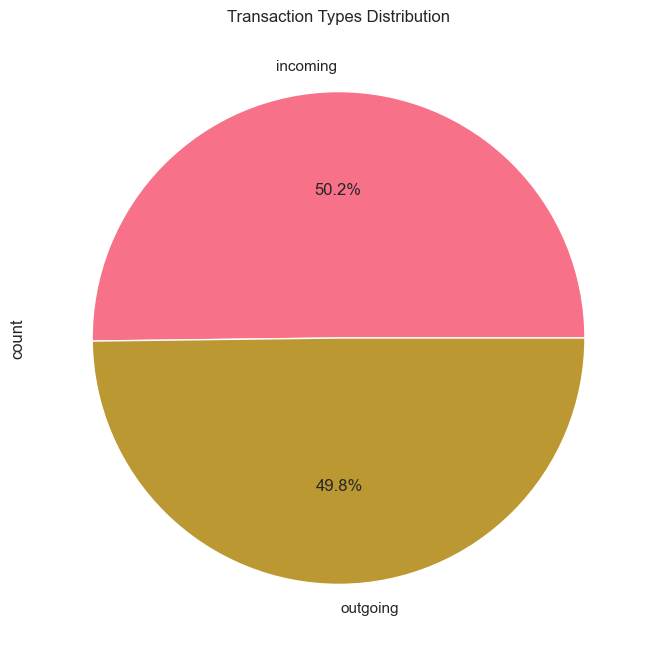

KeyError: 'account_type'

<Figure size 1000x600 with 0 Axes>

In [10]:
# 1. Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=transactions_df, x='amount', bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

# 2. Transaction Types Breakdown
plt.figure(figsize=(8, 8))
transactions_df['transaction_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Transaction Types Distribution')
plt.show()

# 3. Customer Account Types
plt.figure(figsize=(10, 6))
customers_df['account_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Account Types')
plt.xlabel('Account Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# 4. Basic Statistics
print("\nTransaction Amount Statistics:")
print(transactions_df['amount'].describe())

print("\nNumber of Transactions per Type:")
print(transactions_df['transaction_type'].value_counts())

In [11]:
# Först, låt oss se vilka kolumner som finns i customers_df
print("Tillgängliga kolumner i customers_df:")
print(customers_df.columns.tolist())

# Sedan kan vi skapa diagrammet med rätt kolumnnamn
plt.figure(figsize=(10, 6))
customers_df['account_status'].value_counts().plot(kind='bar')  # Jag gissar att det kan vara 'account_status' istället för 'account_type'
plt.title('Distribution of Account Types')
plt.xlabel('Account Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()  # Detta ser till att alla labels syns ordentligt
plt.show()

# Visa också några grundläggande statistik
print("\nFördelning av kontostatistik:")
print(customers_df['account_status'].value_counts())

Tillgängliga kolumner i customers_df:
['Customer', 'Address', 'Phone', 'Personnummer', 'BankAccount']


KeyError: 'account_status'

<Figure size 1000x600 with 0 Axes>

Exempel på BankAccount-värden:
0    SE8902EPWK73250364544965
1    SE8902IDSK51225196610969
2    SE8902OGIV86383792142837
3    SE8902QZEZ52320024971424
4    SE8902DWZI85436013187521
Name: BankAccount, dtype: object


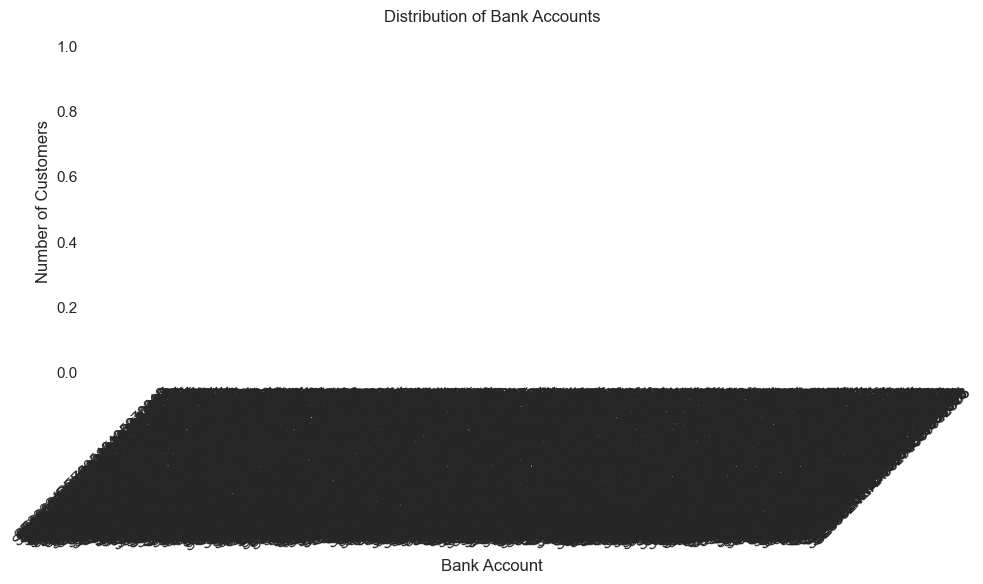


Fördelning av bankkonton:
BankAccount
SE8902JPEZ29549435970218    1
SE8902EPWK73250364544965    1
SE8902IDSK51225196610969    1
SE8902OGIV86383792142837    1
SE8902QZEZ52320024971424    1
                           ..
SE8902URSS59260219235990    1
SE8902IQRO13056391101908    1
SE8902GXLB05514229654020    1
SE8902KWAF90270853352878    1
SE8902MLNA56994057710583    1
Name: count, Length: 1000, dtype: int64


In [12]:
# Först, låt oss se några exempel på BankAccount-värden
print("Exempel på BankAccount-värden:")
print(customers_df['BankAccount'].head())

# Sedan kan vi skapa ett diagram över fördelningen
plt.figure(figsize=(10, 6))
customers_df['BankAccount'].value_counts().plot(kind='bar')
plt.title('Distribution of Bank Accounts')
plt.xlabel('Bank Account')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()  # Detta ser till att alla labels syns ordentligt
plt.show()

# Visa också statistik
print("\nFördelning av bankkonton:")
print(customers_df['BankAccount'].value_counts())

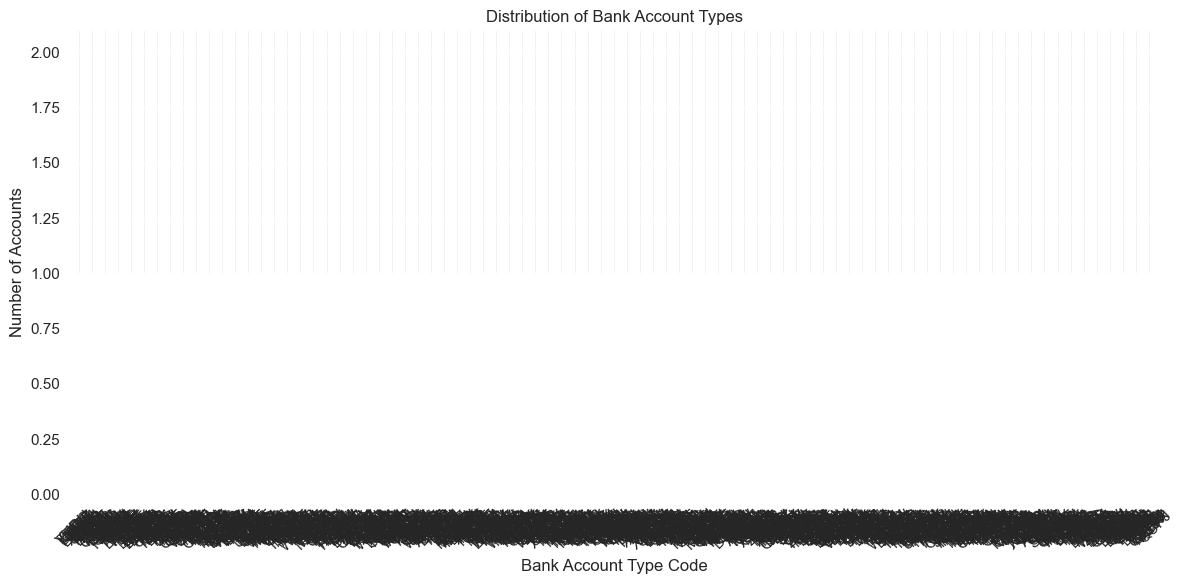


Fördelning av bankkontotyper:
BankAccount
YHDH    2
TTRQ    1
UUTG    1
KWAF    1
JPEZ    1
       ..
FXEO    1
YFAI    1
VUUX    1
TEYP    1
QUFJ    1
Name: count, Length: 999, dtype: int64

Kontroll av kontoformat:
Antal konton som följer formatet: 1000
Antal konton som INTE följer formatet: 0


In [13]:
# Analysera bankkontotyper baserat på de 4 bokstäverna efter SE8902
plt.figure(figsize=(12, 6))
bank_types = customers_df['BankAccount'].str[6:10].value_counts()
bank_types.plot(kind='bar')
plt.title('Distribution of Bank Account Types')
plt.xlabel('Bank Account Type Code')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visa statistik
print("\nFördelning av bankkontotyper:")
print(bank_types)

# Kontrollera om alla konton följer samma format
print("\nKontroll av kontoformat:")
format_check = customers_df['BankAccount'].str.match(r'SE8902[A-Z]{4}\d{14}')
print(f"Antal konton som följer formatet: {format_check.sum()}")
print(f"Antal konton som INTE följer formatet: {(~format_check).sum()}")